In [199]:
import nltk
import pandas as pd
import numpy as np
df = pd.read_csv('final.csv')

In [2]:
df.dtypes

Unnamed: 0          int64
name               object
blend_single       object
classification     object
price             float64
weight              int64
weight in g       float64
weight in oz      float64
flavornotes        object
descriptor         object
roaster            object
location           object
roastlevel         object
roasternotes       object
process            object
sub region         object
harvest time       object
elevation          object
producer           object
varietal           object
dtype: object

In [11]:
sub = df[['name','blend_single', 'classification', 'flavornotes', 'descriptor', 'roaster', 'location', 'roasternotes', 'process', 'sub region', 'producer', 'varietal']]

In [13]:
sub['sub region'].iloc[1] = 'Sub Region San Jose'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
sub['producer'].iloc[1] = 'Producer Cooperativa de Caficultores de Dota R.L.'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
sub[:10]

,name,blend_single,classification,flavornotes,descriptor,roaster,location,roasternotes,process,sub region,producer,varietal
0,71 House,Blends,Sweet & Smooth,a traditional base with hints of milk chocolat...,this signature house blend was crafted as the ...,Irving Farm,"New York, NY",our signature house blend was created as the h...,Washed,,,Bourbon Catuai Caturra
1,Costa Rica Santa Maria,Single Origins,Chocolaty & Sweet,a classic expression of costa rica with hints ...,"smooth, lush, and clean, with soft apple acidi...",Huckleberry,"Denver, CO","santa maria is back in huckleberry's lineup, h...",Washed,San Jose,Cooperativa de Caficultores de Dota R.L.,Catuaí Caturra
2,Ad Astra Signature Blend,Blends,Comforting & Rich,nostalgic with hints of milk chocolate and swe...,"if your coffee substitutes as breakfast, this ...",PT's,"Topeka, KS","ad astra is a very heavy, dark roasted blend o...",Washed Pulped Natural,,,Various
3,"Inkwell, House Blend",Blends,Sweet & Smooth,a traditional base with hints of brown sugar a...,"finally, a crowd-pleaser with some depth. this...",Quills,"Louisville, KY",inkwell has quickly become a favorite for many...,Washed,Tolima Tarrazu,,Colombia Castillo
4,Ruby's,Blends,Comforting & Rich,nostalgic with hints of ripe fruit and milk ch...,"bold and intricately spiced, full of chocolate...",DOMA,"Post Falls, ID","fruity aromas, flavors of chocolate and pepper...",Washed Natural/Dry Processed Wet-hulled,,,Heirloom Tim Tim Bourbon
5,Lyon,Blends,Sweet & Smooth,a traditional base with hints of berry fruit a...,"get toasty, in any weather. nutty and smooth, ...",La Colombe,"Philadelphia, PA","lyon is a coffee with a gentle nature, both in...",Washed Pulped Natural,,,Arabica
6,Corsica,Blends,Roasty & Smoky,"classic, nostalgic, comforting flavors","it’s named for an ancient island, off of italy...",La Colombe,"Philadelphia, PA","it’s a coffee you know and love, with deep, da...",Washed Pulped Natural,,,Arabica
7,Caffe Luna,Blends,Roasty & Smoky,"classic, nostalgic, comforting flavors","sip this by the light of the luna, or with the...",Caffe Vita,"Seattle, WA",caffe vita signature french roast blend of cen...,Washed,,,Bourbon Typica
8,"Ethiopia, Semalo Pride Honey",Single Origins,Chocolaty & Sweet,a classic expression of ethiopia with hints of...,"intensely floral, with a syrupy body and honey...",Maquina,"West Chester, PA",pride mill is deeply isolated in the yirgachef...,Honey,Yirgacheffe,Firewoyne Tesfaye,Ethiopia Heirloom
9,Mixtape,Blends,Sweet & Smooth,a traditional base with hints of milk chocolat...,unlike that crush who didn’t appreciate your m...,Dogwood,"Minneapolis, MN",this blend is like one of the mixtapes you mad...,Washed,Tolima Tarrazu Cajamarca,58 families,Caturra Colombia Typica Catuai Bourbon Typica ...


In [17]:
sub[['process', 'sub region', 'producer', 'varietal']] = sub[['process', 'sub region', 'producer', 'varietal']].fillna('')

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Preprocessing

In [30]:
import re

In [39]:
sub['process'] = sub['process'].apply(lambda x: re.sub('Process\s+', '', x))
sub['sub region'] = sub['sub region'].apply(lambda x: re.sub('Sub\s+Region\s+', '', x))
sub['varietal'] = sub['varietal'].apply(lambda x: re.sub('Varietal\s+', '', x))
sub['producer'] = sub['producer'].apply(lambda x: re.sub('Producer\s+', '', x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [44]:
# Convert all the string to lower cases

sub[['descriptor', 'roasternotes', 'flavornotes']] = sub[['descriptor','roasternotes', 'flavornotes']].apply(lambda x: x.astype(str).str.lower())

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [50]:
sub[['sub region', 'producer']] = sub[['sub region', 'producer']].apply(lambda x: x.astype(str))

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Filtering

In [56]:
sub['descriptor']= sub['descriptor'].apply(lambda x: re.sub('[^\w\s]', '', x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
sub['roasternotes']= sub['roasternotes'].apply(lambda x: re.sub('[^\w\s]', '', x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
sub['flavornotes']= sub['flavornotes'].apply(lambda x: re.sub('[^\w\s]', '', x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
#sub['varietal']= sub['varietal'].apply(lambda x: x.astype(str))
sub['varietal']= sub['varietal'].apply(lambda x: re.sub('[^\w\s]', '', x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
from nltk.tokenize import word_tokenize

In [61]:
word_tokenize(sub['descriptor'].iloc[0])

['this',
 'signature',
 'house',
 'blend',
 'was',
 'crafted',
 'as',
 'the',
 'hallmark',
 'coffee',
 'for',
 'irvings',
 'original',
 'cafe',
 'at',
 '71',
 'irving',
 'place',
 'classic',
 'rich',
 'smooth',
 'flavors',
 'are',
 'great',
 'with',
 'milk']

### Stemming and Lemmazation

In [62]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [196]:
from PIL import Image

### Word Cloud

In [335]:
from wordcloud import WordCloud

In [336]:
import matplotlib.pyplot as plt
%matplotlib inline

In [337]:
coffee_stop = stop

coffee_stop.append('coffee')
coffee_stop.append('coffees')
coffee_stop.append('hints')
coffee_stop.append('none')
coffee_stop.append('note')
coffee_stop.append('notes')
coffee_stop.append('year')
coffee_stop.append('blend')
coffee_stop.append('flavor')
coffee_stop.append('flavors')
coffee_stop.append('forward')
coffee_stop.append('like')
coffee_stop.append('cup')
coffee_stop.append('expression')
coffee_stop.append('elevation')
coffee_stop.append('sweetness')

In [362]:
mask = np.array(Image.open('flat-coffee-cup.jpg')) # image from ''

In [339]:
flavor = WordCloud(background_color="white", max_words=500,stopwords=coffee_stop, collocations=False, width=800, height=400)
flavor.generate(' '.join(sub['flavornotes']))

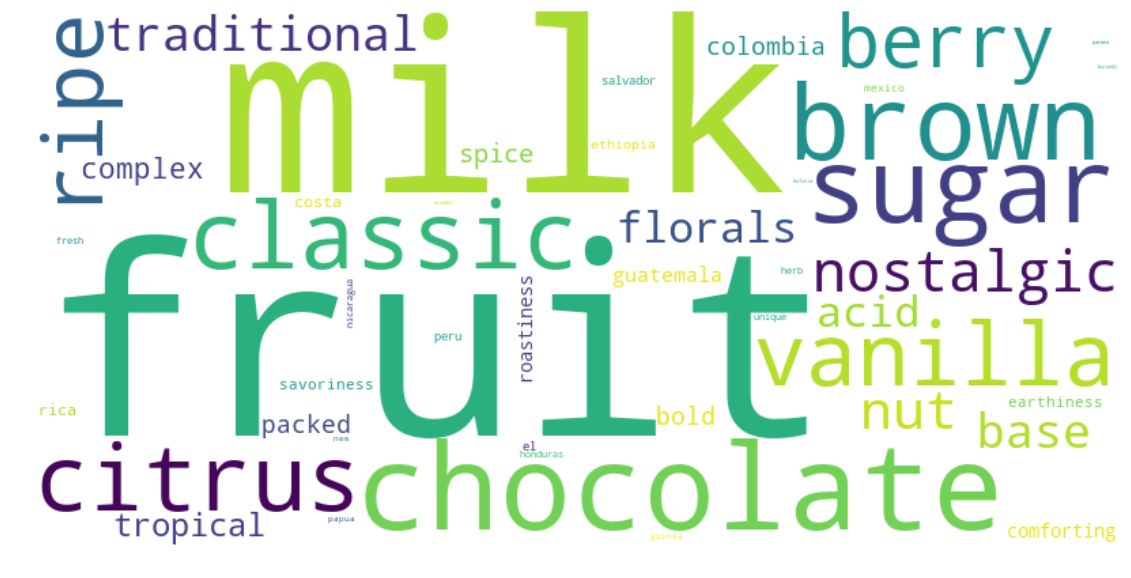

In [359]:
plt.figure(figsize=(20,10))
plt.imshow(flavor, interpolation='bilinear')
plt.axis('off')
flavor.to_file('flavor.jpg')

In [365]:
roaster = WordCloud(background_color='white',  mask=mask, max_words=2000, stopwords=coffee_stop, collocations=False, width=800, height=400)
roaster.generate(' '.join(sub['roasternotes']))

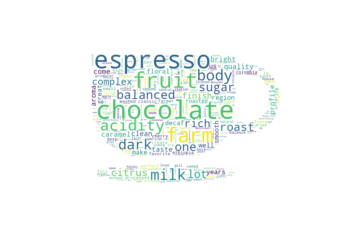

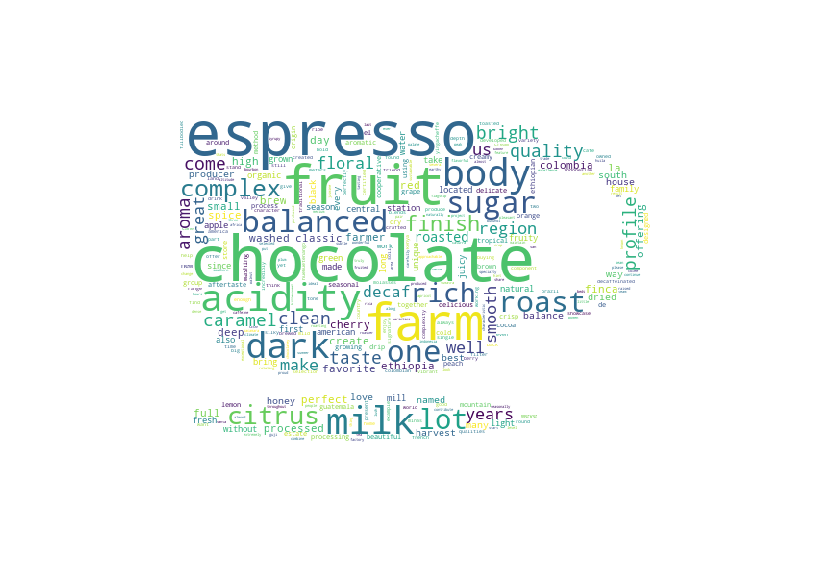

In [366]:
plt.imshow(roaster, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.imshow(roaster)
plt.axis('off')
roaster.to_file('roast.jpg')

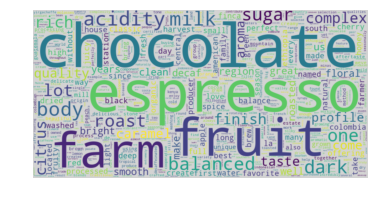

<Figure size 1440x720 with 0 Axes>

In [345]:
roaster = WordCloud(background_color='lightgrey', max_words=2000, stopwords=coffee_stop, collocations=False, width=800, height=400)
roaster.generate(' '.join(sub['roasternotes']))
plt.imshow(roaster, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.imshow(roaster)
roaster.to_file('roast.jpg')

In [367]:
desc = WordCloud(background_color='white', max_words=2000,stopwords=coffee_stop, collocations=False, width=800, height=400)
desc.generate(' '.join(sub['descriptor']))

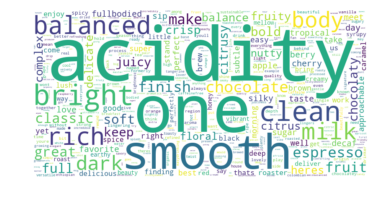

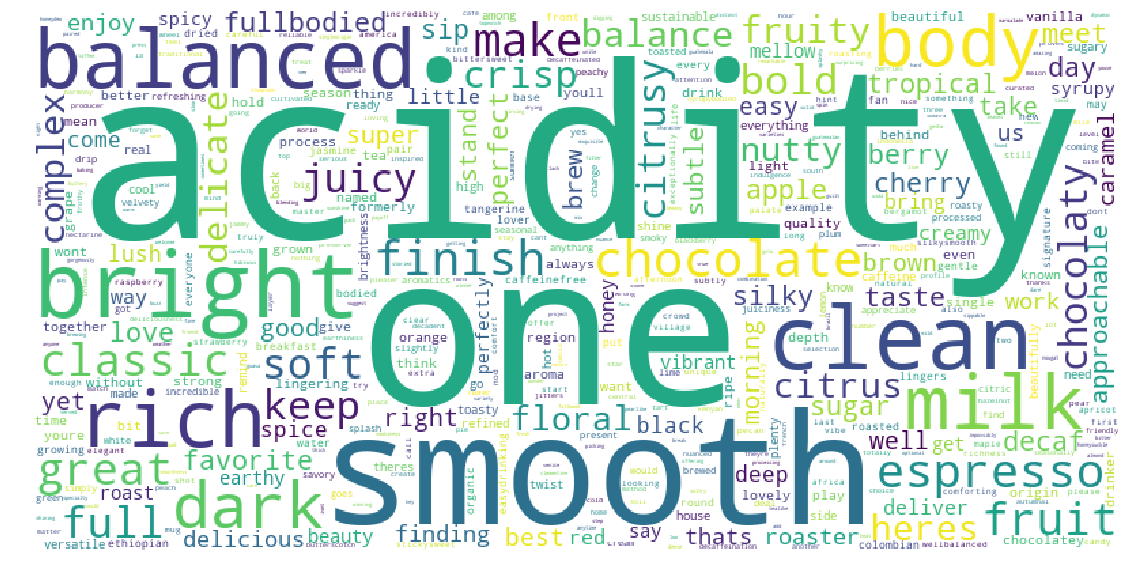

In [369]:
plt.imshow(desc, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.imshow(desc)
plt.axis('off')
desc.to_file('descriptor.jpg')

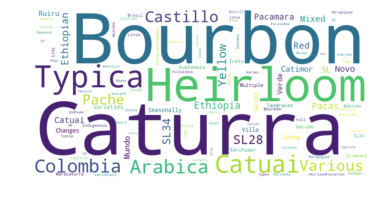

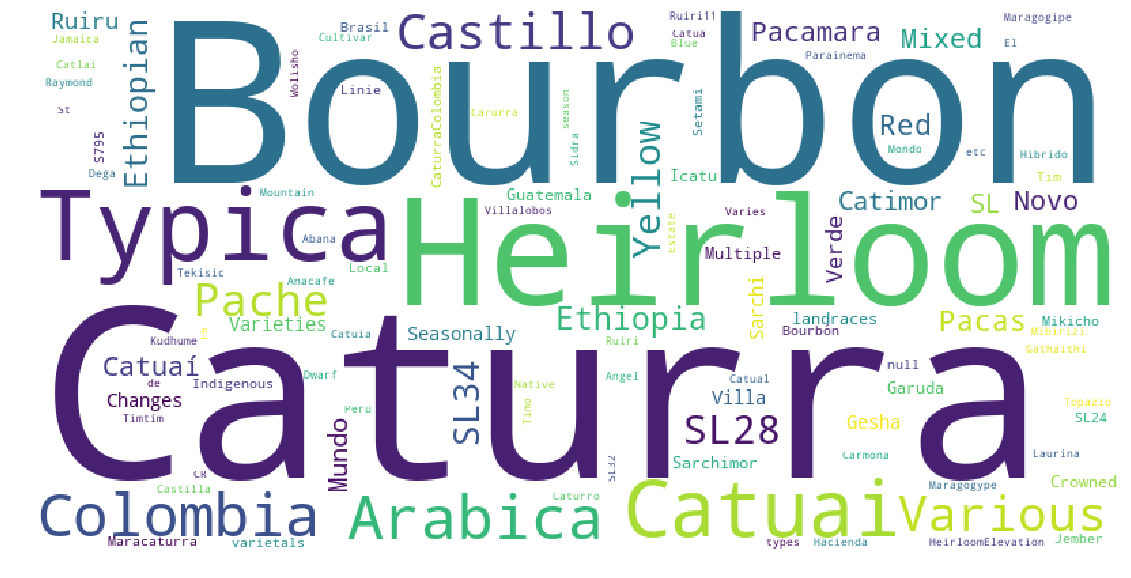

In [371]:
var = WordCloud(background_color='white', max_words=2000, stopwords=coffee_stop, collocations=False, width=800, height=400)
# generate word cloud
var.generate(' '.join(sub['varietal']))
plt.imshow(var, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.imshow(var)
plt.axis('off')
var.to_file('varietal.jpg')